# Spam Classification on Youtube Comments

Dataset is from UCI Machine Learning https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection



The dataset consists of 5 CSV files. Each file contains comments from the same music video.

CSV 1 : PSY 

CSV 2 : Katy Perry

CSV 3 : LMFAO

CSV 4 : Eminem

CSV 5 : Shakira


Comments are valued in the 'Class' column            

0 = non-spam      

1 = spam


Utilized TfidVectorizer to convert words to feature index in matrix. Each sentence becomes a vector and the weights/numbers represent tf-idf score. This package allows texts to be used as inputs for estimators. 





Purpose of this project is to train model to classify whether a comment is considered spam or actual comments. Model can be used to evaluate true activity on posted videos and filter out 'noise' activity. 



___________________________________________________________________________
Trained and predicted with the following classifiers : 

KNeighborsClassifier

SVC

DecisionTreeClassifier

RandomForestClassifier

BaggingClassifier

AdaBoostClassifier


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import glob
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import wordcloud, STOPWORDS 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

from sklearn.exceptions import NotFittedError

In [14]:
path=r'/Users/davidshi/Downloads/YouTube-Spam-Collection-v1'
allfiles=glob.glob(path+"/*.csv")
fili=[]

for filename in allfiles:
    df=pd.read_csv(filename)
    fili.append(df)
df=pd.concat(fili)

combine CSV files from file location

In [15]:
df.shape

(1956, 5)

In [17]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [18]:
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

Although dataframe have nulls, data has no relevance to purpose of project

In [19]:
df=df.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1)

In [20]:
df['LEN']=df['CONTENT'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a224f2890>,
      dtype=object)

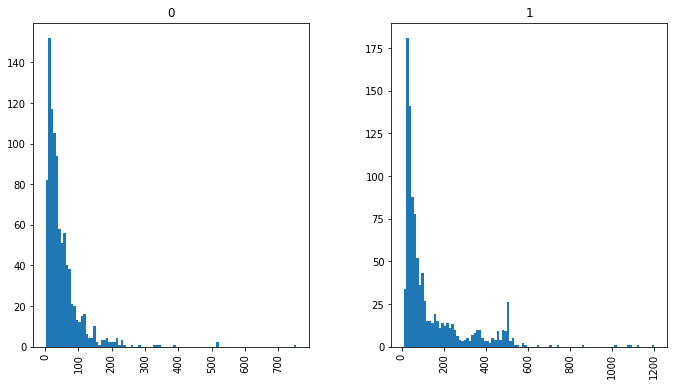

In [59]:
df.hist(column='LEN',by='CLASS',bins=100,figsize=(11,6))

The right side (spam comments) shows that they are typically a bit longer in character length compared to real comments. However the distribution is alike in both instances.

In [36]:
def cleanstring(x):
    
    x = x.translate(str.maketrans('', '', string.punctuation))
    x = [c for c in x.split() if c.lower() not in stopwords.words('english')]
    return " ".join(x)

Above function is to remove punctuation and stop words. Need to clean the comments to be used in TfidVectorizer

In [37]:
content=df['CONTENT'].apply(cleanstring)

In [38]:
content

0      hrefhttpwwwyoutubecomwatchvKQ6zr6kCPj8ampt2m19...
1                                           wierd funny﻿
2      Hey guys I39m humanbr br br don39t want human ...
3                        Party Rocklolwho wants shuffle﻿
4                                            Party rock﻿
                             ...                        
345                   2 billion views theres planet LOL﻿
346                               dont Im watching 2014﻿
347    subscribe call duty vids give aways Goal100 subs﻿
348    hi guys please android photo editor download t...
349    first billion viewed thought really cool billi...
Name: CONTENT, Length: 1956, dtype: object

In [52]:
def show_wordcloud(df, title):
    text = ' '.join(df['CONTENT'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    figure = wordcloud.WordCloud(stopwords=stopwords,background_color='white', width=800, height=800).generate(text)
    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(figure)  
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=30 )
    plt.show()

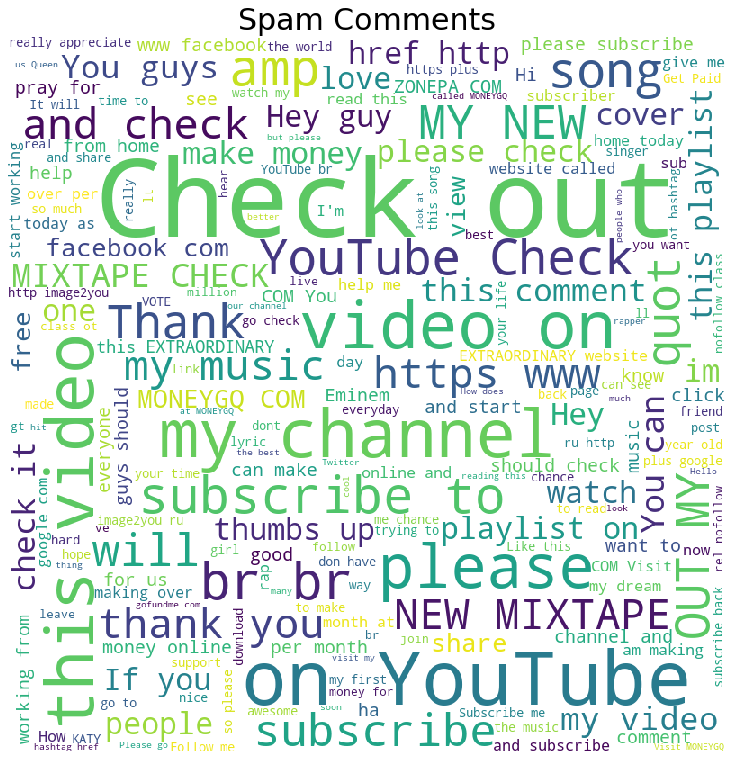

In [53]:
show_wordcloud(df[df['CLASS']==1], "Spam Comments")

WordCloud to depict what words are used in spam comments. The larger size represents higher rate in usage to be classified as spam comments

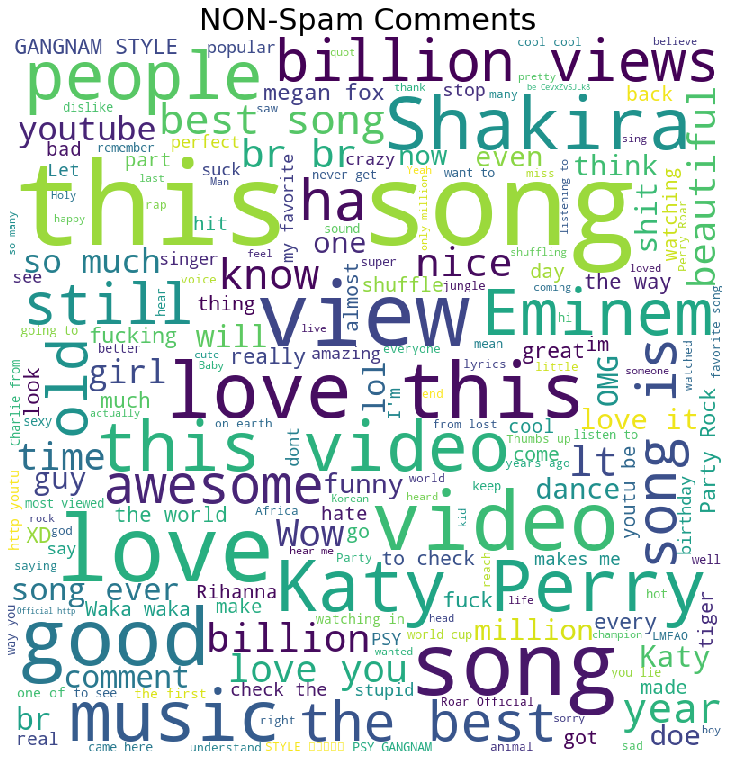

In [54]:
show_wordcloud(df[df['CLASS']==0], "NON-Spam Comments")

WordCloud to depict what words are used in real comments. The larger size represents higher rate in usage to be classified as real comments

# ML Classifiers

In [12]:
X=TfidfVectorizer("english").fit_transform(content)

In [13]:
y=df['CLASS']

In [14]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=0)

In [15]:
results=pd.DataFrame(columns=['method','accuracy score'])

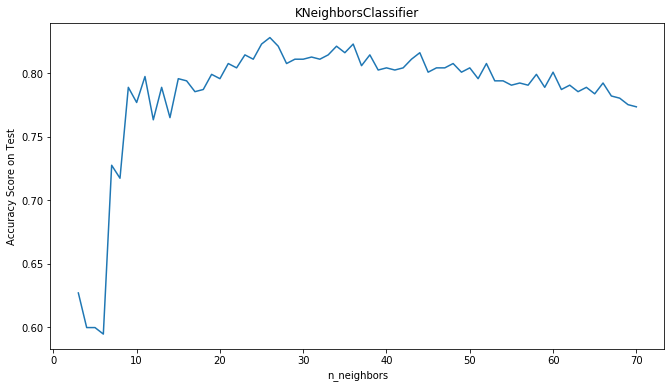

In [16]:
list_scores=pd.DataFrame(columns=['parameter','score'])
for i in range (3,71):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    pred=knc.predict(X_test)
    score = accuracy_score(y_test,pred)
    list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'KNeighborsClassifier','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

For loop is iterating parameter tuning for best fit. Each loop tried different number of n_neighbors and plots the accuracy score. Highest accuracy score is saved into the Results data frame for method comparison later.

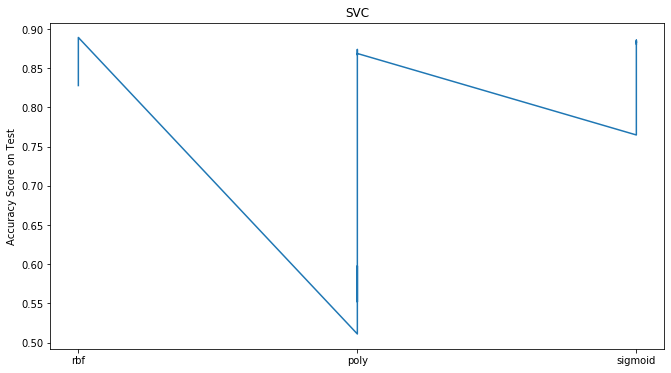

In [17]:
list_scores=pd.DataFrame(columns=['parameter','score'])
kernel = {'rbf','poly','sigmoid'}
for i in kernel:
    for x in np.linspace(0.05,1,num=20):
        svc = SVC(kernel=i,gamma=x)
        svc.fit(X_train,y_train)
        pred=svc.predict(X_test)
        score = accuracy_score(y_test,pred)
        list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'SVC','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('SVC')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

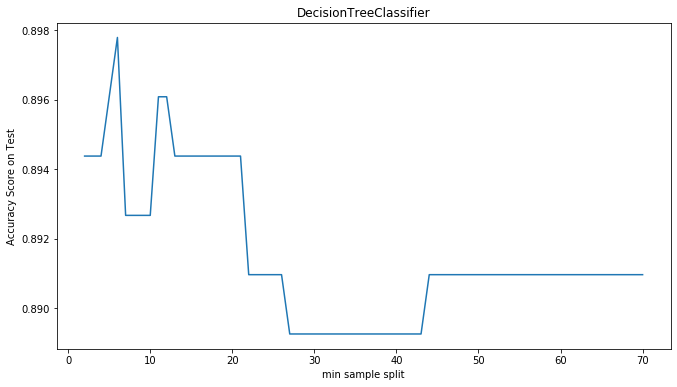

In [18]:
list_scores=pd.DataFrame(columns=['parameter','score'])
for i in range (2,71):
    dtc = DecisionTreeClassifier(min_samples_split=i,random_state=1)
    dtc.fit(X_train,y_train)
    pred=dtc.predict(X_test)
    score = accuracy_score(y_test,pred)
    list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'DecisionTreeClassifier','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('DecisionTreeClassifier')
plt.xlabel('min sample split')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

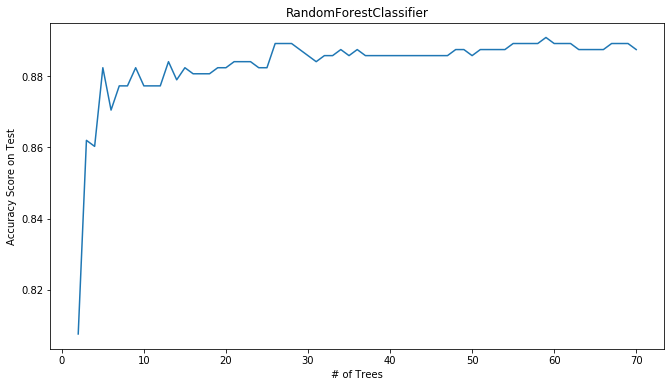

In [19]:
list_scores=pd.DataFrame(columns=['parameter','score'])
for i in range (2,71):
    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
    rfc.fit(X_train,y_train)
    pred=rfc.predict(X_test)
    score = accuracy_score(y_test,pred)
    list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'RandomForestClassifier','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('RandomForestClassifier')
plt.xlabel('# of Trees')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

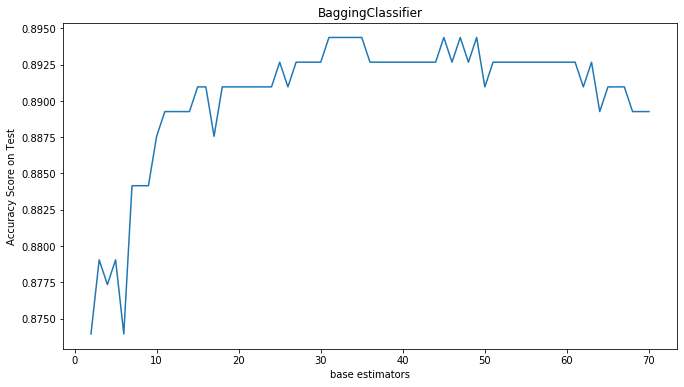

In [20]:
list_scores=pd.DataFrame(columns=['parameter','score'])
for i in range (2,71):
    bc = BaggingClassifier(n_estimators=i,random_state=1)
    bc.fit(X_train,y_train)
    pred=bc.predict(X_test)
    score = accuracy_score(y_test,pred)
    list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'BaggingClassifier','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('BaggingClassifier')
plt.xlabel('base estimators')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

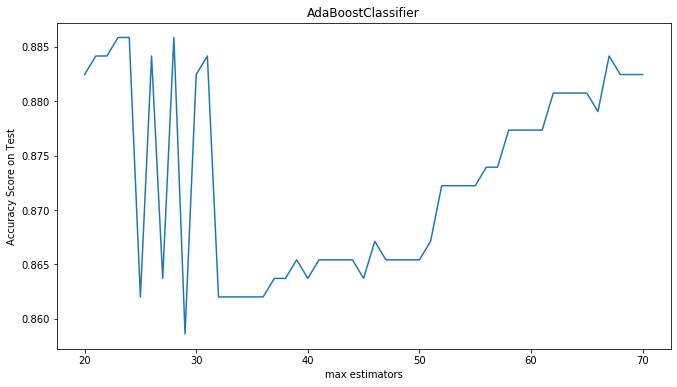

In [21]:
list_scores=pd.DataFrame(columns=['parameter','score'])
for i in range (20,71):
    abc = AdaBoostClassifier(n_estimators=i,random_state=1)
    abc.fit(X_train,y_train)
    pred=abc.predict(X_test)
    score = accuracy_score(y_test,pred)
    list_scores=list_scores.append({'parameter':i,'score': score}, ignore_index=True)
maxscore=list_scores['score'].max()
results=results.append({'method':'AdaBoostClassifier','accuracy score':maxscore}, ignore_index=True)
plt.figure(figsize=(11,6))
plt.title('AdaBoostClassifier')
plt.xlabel('max estimators')
plt.ylabel('Accuracy Score on Test')
plt.plot('parameter','score',data=list_scores)

In [22]:
results

,method,accuracy score
0,KNeighborsClassifier,0.827939
1,SVC,0.889267
2,DecisionTreeClassifier,0.897785
3,RandomForestClassifier,0.890971
4,BaggingClassifier,0.894378
5,AdaBoostClassifier,0.885860


The loops are used to tune the parameters for best fit for each classifier.

Ultimately we see KNeightbors Classifier performs the worst. The other classifiers show pretty similar max accuracy score.